In [1]:
from IPython.core.display import HTML
css_file = 'pynoddy.css'
HTML(open(css_file, "r").read())

In [2]:
%matplotlib inline

In [4]:
# here the usual imports. If any of the imports fails, make sure that pynoddy is installed
# properly, ideally with 'python setup.py develop' or 'python setup.py install'
import sys, os
import matplotlib.pyplot as plt
import numpy as np

# adjust some settings for matplotlib
from matplotlib import rcParams
# print rcParams
rcParams['font.size'] = 15

# determine path of repository to set paths corretly below
repo_path = os.path.realpath('../..')
import pynoddy.history
import pynoddy.experiment.UncertaintyAnalysis
rcParams.update({'font.size': 20})

print "Success. Ignore? warnings here - scipy is funny sometimes."

Success. Ignore? warnings here - scipy is funny sometimes.


##Using the UncertaintyAnalysis class

Methods for visualising the lithological variability produced by purturbation of the input datasets, which can be considered a proxy for lithological uncertainty, are implemented in the UncertaintyAnalysis class.

Initialisising a new UncertaintyAnalysis experiment is no different to initialising a MonteCarlo experiment (as UncertaintyAnalysis uses this class extensively) - we load a history file and associated csv file defining the PDF's to sample the input data from.

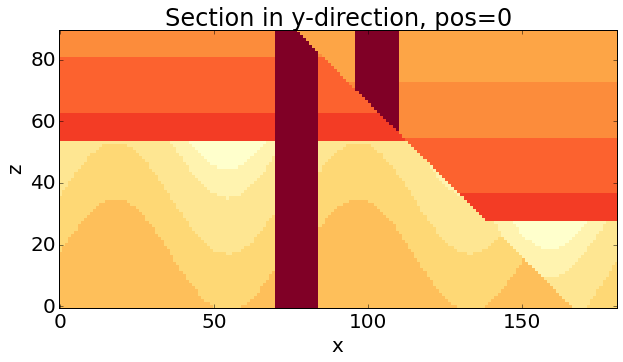

In [6]:
reload(pynoddy.history)
reload(pynoddy.output)
reload(pynoddy.experiment.UncertaintyAnalysis)
reload(pynoddy)

from pynoddy.experiment.UncertaintyAnalysis import UncertaintyAnalysis


# the model itself is now part of the repository, in the examples directory:
history_file = os.path.join(repo_path, "examples/fold_dyke_fault.his")

#this file defines the statistical distributions to sample from
params = os.path.join(repo_path, "examples/fold_dyke_fault.csv")

uc_experiment = UncertaintyAnalysis(history_file,params)

#plot the intial model
uc_experiment.change_cube_size(55)

uc_experiment.plot_section(direction='y',position='center')

The next step is to perform the Monte Carlo purturbation of this initial model, and use this to estimate uncertainty. This sampling is wrapped into the estimate_uncertainty function - all that is required from us is the number of trials to produce. Realistically, several thousand samples are typically necessary before sampling can be considered representative. However, in order to speed things up a bit we'll produce 10 model samples.

In [7]:
uc_experiment.estimate_uncertainty(10,verbose=False)

Now, a quick description of what we have done... the estimate_uncertainty function generates the specified amount (10) of randomly varying models using the MonteCarlo class. It then loads the output and loops calculates the lithology present at each voxel in each model. This information is used to calculate probability maps for each lithology at each point in the model! This can be seen if we plot the probability of observing lithology 3:

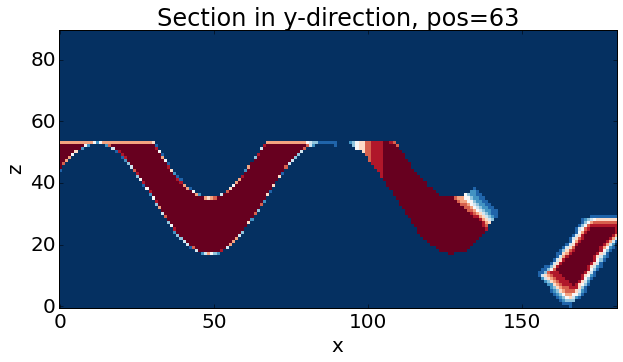

In [8]:
uc_experiment.plot_probability(4, direction='y',position='center')

These probability maps can then be used to calculate the information entropy of each cell. These can then be plotted as follows:

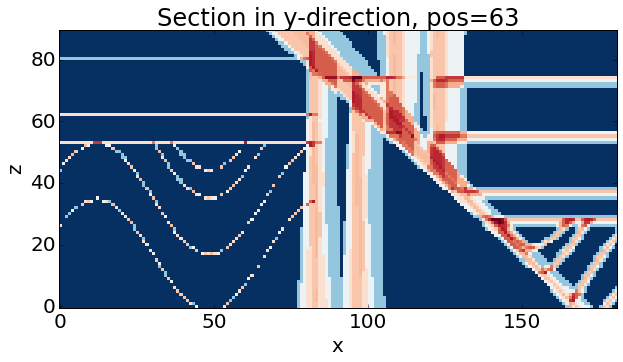

In [9]:
uc_experiment.plot_entropy(direction='y',position='center')

Areas with a high information entropy are shown in red, and correspond to voxels with more variable lithology values. Hence, these voxels are the most uncertain. This general approach can be used on nearly any model, and gives a decent indication of areas with substantial uncertainty.

Have fun, and please refer to the next notebook for an example of these methods applied to a more realistic geological model.